In [25]:
# IMPORTS
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# load the model
model = joblib.load('model/best_LGB_10k_Undersampled_BestParams.pkl')

# load curves
CURVES = pd.read_pickle('../data/cleaned/curves.pkl')

#full data
full_data = pd.read_csv('../data/raw/application_train.csv')

Loan Value: 267070.5
Interest  : 21231.0


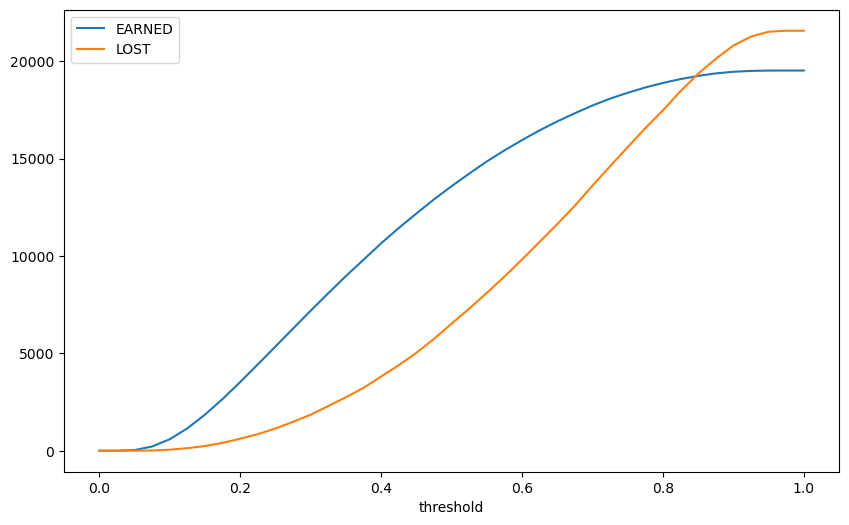

In [61]:
df_random_client = full_data.sample(n=1)

amount_loan = df_random_client.head(1)['AMT_CREDIT'].values[0]
amount_interest = df_random_client.head(1)['AMT_ANNUITY'].values[0]

print ('Loan Value:',  amount_loan)
print ('Interest  :',  amount_interest)

W0                   = amount_interest
W1                   = amount_loan

CURVES['EARNED']     = W0*CURVES.TN
CURVES['NOT_EARNED'] = W0*CURVES.FP
CURVES['LOST']       = W1*CURVES.FN
CURVES['GAIN']       = CURVES.EARNED - CURVES.LOST
CURVES['MAX_GAIN']   = CURVES.EARNED + CURVES.NOT_EARNED

fig, ax = plt.subplots(figsize =(10, 6))
graph = CURVES.plot(ax=ax, x='threshold', y=['EARNED', 'LOST'])

In [50]:
# NOT USED YET

#fig, ax = plt.subplots(2, sharex=True, figsize =(10, 12))
#CURVES.plot(ax=ax[0], x='threshold', y=['EARNED', 'LOST'])
#CURVES.plot(ax=ax[1], x='threshold', y=['GAIN', 'MAX_GAIN'])
#g = ax[1].plot([0,1],[0,0], 'r:')
